<a href="https://colab.research.google.com/github/HarshaGowtham/UNICEF_RESEARCH_DEEP_LEARNING/blob/master/E%26S_Analysis_UNICEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [111]:
##reading the dataset
df = pd.read_csv('/content/drive/MyDrive/work_space/My_projects/UNICEF_RESEARCH/realtime_brazil_Nov_2021.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,connectivity_latency,created,modified,date,connectivity_speed,school_id,name,lon,lat,country_name
0,14.0,2021-11-12 16:04:35.05804+00,2021-11-13 00:03:13.616857+00,11/12/2021,5166000,52022986,ESCOLA MUNICIPAL PADRE FELICIANO,-49.5142,-16.3409,Brazil
1,20.0,2021-11-17 20:04:48.991491+00,2021-11-18 00:02:16.884964+00,11/17/2021,168662000,41076249,CERES DE FERRANTE E M EF,-54.5185,-25.4977,Brazil
2,38.0,2021-11-17 16:05:26.075787+00,2021-11-18 00:03:33.945163+00,11/17/2021,4194000,27341011,ESCOLA MUNICIPAL JABES FRANCISCO DA SILVA,-36.0227,-9.5039,Brazil
3,13.0,2021-11-19 20:08:54.248163+00,2021-11-20 00:05:27.91364+00,11/19/2021,49944500,42130700,N E I SANTA INES,-48.6390,-27.0071,Brazil
4,22.0,2021-11-18 16:02:52.903315+00,2021-11-19 00:01:36.366648+00,11/18/2021,98107000,43043151,ESC EST ENS FUN DONA HERCILIA PETRY,-51.0873,-29.1132,Brazil


In [112]:
df.shape

(394901, 10)

In [113]:
#checking the null values
df.isna().sum()


connectivity_latency    842
created                   0
modified                  0
date                      0
connectivity_speed        0
school_id                 0
name                      0
lon                       0
lat                       0
country_name              0
dtype: int64

In [114]:
df.describe()

,connectivity_latency,connectivity_speed,lon,lat
count,394059.000000,3.949010e+05,394901.000000,394901.000000
mean,56.287289,5.974072e+07,-47.097631,-18.251016
std,159.317722,7.486509e+07,6.074717,8.343298
min,0.000000,0.000000e+00,-73.370900,-33.690500
25%,9.000000,1.421700e+07,-51.198600,-24.548400
50%,18.000000,3.977900e+07,-48.270900,-21.242000
75%,39.000000,9.405000e+07,-42.829400,-10.685100
max,9802.000000,9.814920e+08,-13.229350,13.973995


In [115]:
#datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394901 entries, 0 to 394900
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   connectivity_latency  394059 non-null  float64
 1   created               394901 non-null  object 
 2   modified              394901 non-null  object 
 3   date                  394901 non-null  object 
 4   connectivity_speed    394901 non-null  int64  
 5   school_id             394901 non-null  object 
 6   name                  394901 non-null  object 
 7   lon                   394901 non-null  float64
 8   lat                   394901 non-null  float64
 9   country_name          394901 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.1+ MB


In [116]:
df['school_id'].str.contains( ' ')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
394896    NaN
394897    NaN
394898    NaN
394899    NaN
394900    NaN
Name: school_id, Length: 394901, dtype: object

In [117]:
df['name'] = df['name'].astype('str')
df['country_name'] = df['country_name'].astype('str')


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394901 entries, 0 to 394900
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   connectivity_latency  394059 non-null  float64
 1   created               394901 non-null  object 
 2   modified              394901 non-null  object 
 3   date                  394901 non-null  object 
 4   connectivity_speed    394901 non-null  int64  
 5   school_id             394901 non-null  object 
 6   name                  394901 non-null  object 
 7   lon                   394901 non-null  float64
 8   lat                   394901 non-null  float64
 9   country_name          394901 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


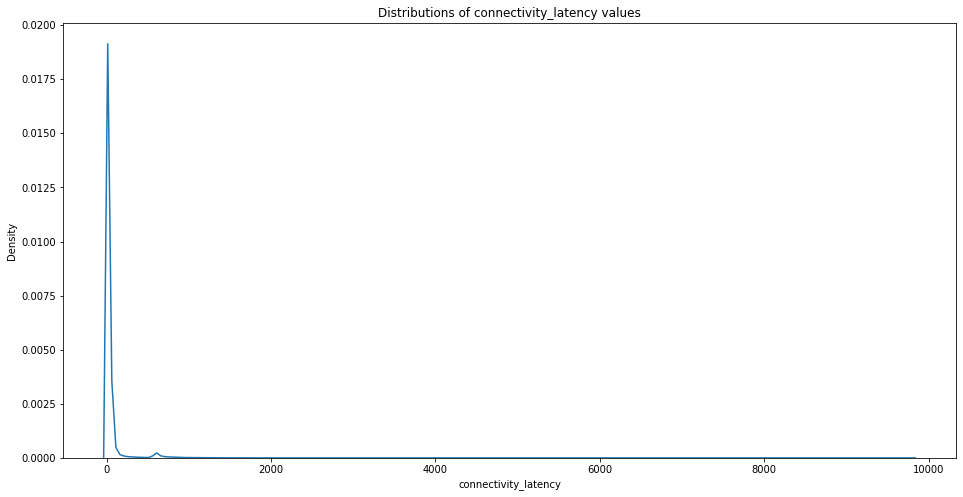

In [119]:
plt.figure(figsize = (16,8))
plt.title("Distributions of connectivity_latency values")
sns.distplot(df['connectivity_latency'] , kde = True , hist = False, bins = 24 , label = 'connectivity_latency')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


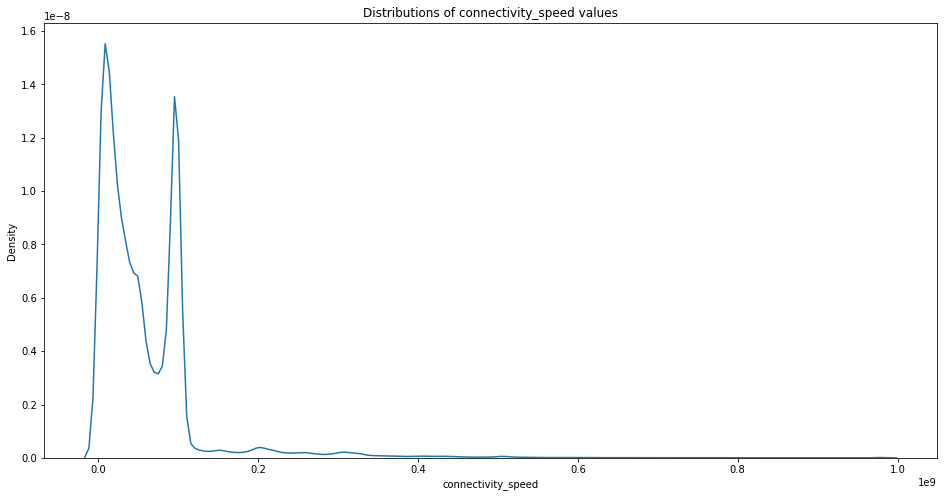

In [120]:
plt.figure(figsize = (16,8))
plt.title("Distributions of connectivity_speed values")
sns.distplot( df['connectivity_speed'] ,label =  'connectivity_speed' ,  kde = True, hist = False , bins = 240 )
plt.show()


<Figure size 1368x720 with 0 Axes>

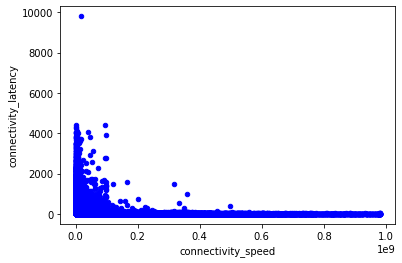

In [121]:
##looking at the relationship between the connectivity_speed and the connectivity_latency
plt.figure(figsize= (19,10))
df.plot(kind='scatter' ,x='connectivity_speed',y='connectivity_latency',color='blue')
plt.show()


**HERE THE CONNECTIVITY_LATENCY IS NOT MOVING BEYOND A POINT WHILE THE CONNECTIVITY SPEED IS INCREASING**

In [122]:
#checking is there any other country's data is included along with brazil
df['country_name'].unique()

array(['Brazil', 'Saint Lucia', 'Sierra Leone'], dtype=object)

**some data is included like saint lucia, Sierra Leone other than brazil**

---






In [125]:
#considering only brazil's data
df = df[df['country_name'] == 'Brazil']

In [124]:
df['country_name'].unique()

array(['Brazil'], dtype=object)

**Deleted the Data other than Brazil's**

In [126]:
df.shape

(394801, 10)

In [127]:
df.head()

,connectivity_latency,created,modified,date,connectivity_speed,school_id,name,lon,lat,country_name
0,14.0,2021-11-12 16:04:35.05804+00,2021-11-13 00:03:13.616857+00,11/12/2021,5166000,52022986,ESCOLA MUNICIPAL PADRE FELICIANO,-49.5142,-16.3409,Brazil
1,20.0,2021-11-17 20:04:48.991491+00,2021-11-18 00:02:16.884964+00,11/17/2021,168662000,41076249,CERES DE FERRANTE E M EF,-54.5185,-25.4977,Brazil
2,38.0,2021-11-17 16:05:26.075787+00,2021-11-18 00:03:33.945163+00,11/17/2021,4194000,27341011,ESCOLA MUNICIPAL JABES FRANCISCO DA SILVA,-36.0227,-9.5039,Brazil
3,13.0,2021-11-19 20:08:54.248163+00,2021-11-20 00:05:27.91364+00,11/19/2021,49944500,42130700,N E I SANTA INES,-48.6390,-27.0071,Brazil
4,22.0,2021-11-18 16:02:52.903315+00,2021-11-19 00:01:36.366648+00,11/18/2021,98107000,43043151,ESC EST ENS FUN DONA HERCILIA PETRY,-51.0873,-29.1132,Brazil


**Checking the frequency of duplicates**

In [128]:
df.duplicated(subset = 'school_id').sum()

344445

In [129]:
df.duplicated(subset = 'date').sum()

394772

In [130]:
df.duplicated(subset = 'name').sum()

361184

In [138]:
##looking at the repeated school_id's
dups1 = df.pivot_table(index = ['school_id'], aggfunc ='size')  
dups1

school_id
11000040    14
11000457     1
11000562    14
11000856    19
11000937     1
            ..
53017080     1
53019806     6
53047010     1
53068025     1
53068211     1
Length: 50356, dtype: int64

In [132]:
df1 = df.groupby(['school_id']).count()
df1

,connectivity_latency,created,modified,date,connectivity_speed,name,lon,lat,country_name
school_id,,,,,,,,,
11000040,14,14,14,14,14,14,14,14,14
11000457,1,1,1,1,1,1,1,1,1
11000562,14,14,14,14,14,14,14,14,14
11000856,19,19,19,19,19,19,19,19,19
11000937,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
53017080,1,1,1,1,1,1,1,1,1
53019806,6,6,6,6,6,6,6,6,6
53047010,1,1,1,1,1,1,1,1,1


**Number of times each school_id repeated**

In [139]:
dups2 = df.pivot_table(index = ['name'], aggfunc ='size')  
dups2

name
0101001 ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO        2
0101003 ESCOLA MUNICIPAL DARCY VARGAS                   9
0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENERANDO    20
0101501 CIEP HENFIL                                    12
0101603 CRECHE MUNICIPAL SENNINHA                       8
                                                       ..
ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB              18
ZULMIRO ALVES DE SIQUEIRA                               3
ZULMIRO TRENTO E E DO C EF                             17
ZUMBI DOS PALMARES C E C EF M                          12
ZUMBI DOS PALMARES C E EF M PROFIS                     22
Length: 33617, dtype: int64

In [140]:
df2 = df.groupby(['name']).count()
df2

,connectivity_latency,created,modified,date,connectivity_speed,school_id,lon,lat,country_name
name,,,,,,,,,
0101001 ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,2,2,2,2,2,2,2,2,2
0101003 ESCOLA MUNICIPAL DARCY VARGAS,9,9,9,9,9,9,9,9,9
0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENERANDO,20,20,20,20,20,20,20,20,20
0101501 CIEP HENFIL,12,12,12,12,12,12,12,12,12
0101603 CRECHE MUNICIPAL SENNINHA,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...
ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB,18,18,18,18,18,18,18,18,18
ZULMIRO ALVES DE SIQUEIRA,3,3,3,3,3,3,3,3,3
ZULMIRO TRENTO E E DO C EF,17,17,17,17,17,17,17,17,17


**Number of times each school_name repeated**

In [141]:
dups3 = df.pivot_table(index = ['date'], aggfunc ='size')  
dups3

date
11/1/2021      4096
11/10/2021    19973
11/11/2021    20379
11/12/2021    19579
11/13/2021     3767
11/14/2021     2660
11/15/2021     3042
11/16/2021    20108
11/17/2021    20316
11/18/2021    20378
11/19/2021    19917
11/2/2021      1914
11/20/2021     4190
11/21/2021     3781
11/22/2021    20137
11/23/2021    20527
11/24/2021    20231
11/25/2021    20254
11/26/2021    19622
11/27/2021     3841
11/28/2021     3543
11/29/2021    19713
11/3/2021     18125
11/4/2021     20722
11/5/2021     18730
11/6/2021      4245
11/7/2021      2503
11/8/2021     19207
11/9/2021     19301
dtype: int64

In [142]:
df3 = df.groupby(['date']).count()
df3

,connectivity_latency,created,modified,connectivity_speed,school_id,name,lon,lat,country_name
date,,,,,,,,,
11/1/2021,4091,4096,4096,4096,4096,4096,4096,4096,4096
11/10/2021,19919,19973,19973,19973,19973,19973,19973,19973,19973
11/11/2021,20339,20379,20379,20379,20379,20379,20379,20379,20379
11/12/2021,19532,19579,19579,19579,19579,19579,19579,19579,19579
11/13/2021,3760,3767,3767,3767,3767,3767,3767,3767,3767
11/14/2021,2656,2660,2660,2660,2660,2660,2660,2660,2660
11/15/2021,3038,3042,3042,3042,3042,3042,3042,3042,3042
11/16/2021,20053,20108,20108,20108,20108,20108,20108,20108,20108
11/17/2021,20274,20316,20316,20316,20316,20316,20316,20316,20316


**Number of times each date repeated**

In [143]:
df4 = df.groupby(['date' , 'school_id']).count()
df4

connectivity_latency  created  modified  \
date      school_id                                            
11/1/2021 11001828                      1        1         1   
          11048689                      1        1         1   
          11049936                      1        1         1   
          12000132                      1        1         1   
          12002046                      1        1         1   
...                                   ...      ...       ...   
11/9/2021 53008979                      1        1         1   
          53011511                      1        1         1   
          53012046                      1        1         1   
          53013280                      1        1         1   
          53016220                      1        1         1   

                     connectivity_speed  name  lon  lat  country_name  
date      school_id                                                    
11/1/2021 11001828                    1     1    1    1             1  
          11048689                    1     1    1    1             1  
          11049936                    1     1    1    1             1  
          12000132                    1     1    1    1             1  
          12002046                    1     1    1    1             1  
...                                 ...   ...  ...  ...           ...  
11/9/2021 53008979                    1     1    1    1             1  
          53011511                    1     1    1    1             1  
          53012046                    1     1    1    1             1  
          53013280                    1     1    1    1             1  
          53016220                    1     1    1    1             1  

[394801 rows x 8 columns]

**stacking the school_id's with date**

In [144]:
df5 = df.groupby(['date' , 'name']).count()
df5

connectivity_latency  \
date      name                                                                       
11/1/2021 0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENER...                     1   
          0204803 EDI GABRIELA MISTRAL                                           1   
          0206502 CIEP NACAO RUBRO NEGRA                                         1   
          0312801 EDI HENRIQUE FOREIS                                            1   
          0410807 EDI PROFESSORA TANIA DA ROCHA CORREA                           1   
...                                                                            ...   
11/9/2021 ZULMIRA DE ALMEIDA LAMBERT PROFESSORA                                  1   
          ZULMIRA MARCHESI SILVA C E EF M                                        1   
          ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB                              1   
          ZULMIRO TRENTO E E DO C EF                                             1   
          ZUMBI DOS PALMARES C E EF M PROFIS                                     1   

                                                              created  \
date      name                                                          
11/1/2021 0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENER...        1   
          0204803 EDI GABRIELA MISTRAL                              1   
          0206502 CIEP NACAO RUBRO NEGRA                            1   
          0312801 EDI HENRIQUE FOREIS                               1   
          0410807 EDI PROFESSORA TANIA DA ROCHA CORREA              1   
...                                                               ...   
11/9/2021 ZULMIRA DE ALMEIDA LAMBERT PROFESSORA                     1   
          ZULMIRA MARCHESI SILVA C E EF M                           1   
          ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB                 1   
          ZULMIRO TRENTO E E DO C EF                                1   
          ZUMBI DOS PALMARES C E EF M PROFIS                        1   

                                                              modified  \
date      name                                                           
11/1/2021 0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENER...         1   
          0204803 EDI GABRIELA MISTRAL                               1   
          0206502 CIEP NACAO RUBRO NEGRA                             1   
          0312801 EDI HENRIQUE FOREIS                                1   
          0410807 EDI PROFESSORA TANIA DA ROCHA CORREA               1   
...                                                                ...   
11/9/2021 ZULMIRA DE ALMEIDA LAMBERT PROFESSORA                      1   
          ZULMIRA MARCHESI SILVA C E EF M                            1   
          ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB                  1   
          ZULMIRO TRENTO E E DO C EF                                 1   
          ZUMBI DOS PALMARES C E EF M PROFIS                         1   

                                                              connectivity_speed  \
date      name                                                                     
11/1/2021 0101011 ESCOLA MUNICIPAL GEO FELIX MIELLI VENER...                   1   
          0204803 EDI GABRIELA MISTRAL                                         1   
          0206502 CIEP NACAO RUBRO NEGRA                                       1   
          0312801 EDI HENRIQUE FOREIS                                          1   
          0410807 EDI PROFESSORA TANIA DA ROCHA CORREA                         1   
...                                                                          ...   
11/9/2021 ZULMIRA DE ALMEIDA LAMBERT PROFESSORA                                1   
          ZULMIRA MARCHESI SILVA C E EF M                                      1   
          ZULMIRA PEDRO SAWAYA DONADELLI PROFA EMEB                            1   
          ZULMIRO TRENTO E E DO C EF                                           1   
          ZUMBI DOS PA

**stacking the school names with date**

In [146]:
df.isna().sum()

connectivity_latency    842
created                   0
modified                  0
date                      0
connectivity_speed        0
school_id                 0
name                      0
lon                       0
lat                       0
country_name              0
dtype: int64

In [147]:
df5.isna().sum()

connectivity_latency    0
created                 0
modified                0
connectivity_speed      0
school_id               0
lon                     0
lat                     0
country_name            0
dtype: int64

In [152]:
df.shape

(394801, 10)

In [153]:
df6 = df.groupby(['date' , 'school_id']).mean('connectivity_speed')
df6.head()

connectivity_latency  connectivity_speed      lon     lat
date      school_id                                                           
11/1/2021 11001828                   27.0         109899666.0 -63.8987 -8.7770
          11048689                   50.0          97364000.0 -63.6998 -8.7824
          11049936                   40.0         171218000.0 -63.8983 -8.7380
          12000132                   70.0          39827000.0 -72.6469 -7.6405
          12002046                   66.0          97793000.0 -72.9250 -7.5959